##CSE-221710313011-D.Manasa

In [1]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/Summer Internship/all_stocks_5yr.csv")

In [2]:
data.shape

(619040, 7)

In [4]:
# Top Five rows
data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [5]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [6]:
data['Name'].value_counts()

SYY     1259
SNI     1259
FLIR    1259
WBA     1259
XL      1259
        ... 
DXC      215
BHGE     152
BHF      143
DWDP     109
APTV      44
Name: Name, Length: 505, dtype: int64

In [7]:
### How many company's data we have here?
data.Name.nunique()

505

In [8]:
## Selecting the data AAL
df = data[data['Name']=='AAP']
df.shape

(1259, 7)

In [9]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [10]:
#select the columns data and close price
df = df[['date','close']]
df

,date,close
2518,2013-02-08,78.90
2519,2013-02-11,78.39
2520,2013-02-12,78.60
2521,2013-02-13,78.97
2522,2013-02-14,78.84
...,...,...
3772,2018-02-01,117.29
3773,2018-02-02,113.93
3774,2018-02-05,109.86
3775,2018-02-06,112.20


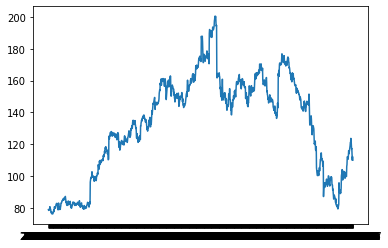

In [11]:
#line plot
import matplotlib.pyplot as plt
plt.plot(df['date'],df['close'])

In [12]:
df.date[:10]

2518    2013-02-08
2519    2013-02-11
2520    2013-02-12
2521    2013-02-13
2522    2013-02-14
2523    2013-02-15
2524    2013-02-19
2525    2013-02-20
2526    2013-02-21
2527    2013-02-22
Name: date, dtype: object

In [13]:
### Missing values in the data
df.isnull().sum()

date     0
close    0
dtype: int64

In [14]:
df.shape

(1259, 2)

In [15]:
## Preparing the data
## Features and target
## Input and output
## last 7 days data as input
## X -- [[d1-d7],[d9,d15],[d17,23]....]
## y -- [d8,d16,d24,...]

## X = [[d1-d7],[d2-d8],]
## y = [d8,d9]

X = [] ## input
y = [] ## ouput
for i  in range(df.shape[0]-7-1):   
  X.append(df['close'][i:i+7])# 0 -->[0:7], 1-->[1:8]
  y.append(df['close'][i+2525])# 7,8,9
print(X[:2])

[2518    78.90
2519    78.39
2520    78.60
2521    78.97
2522    78.84
2523    79.00
2524    80.72
Name: close, dtype: float64, 2519    78.39
2520    78.60
2521    78.97
2522    78.84
2523    79.00
2524    80.72
2525    79.50
Name: close, dtype: float64]


In [16]:
import numpy as np
X = np.array(X)

In [17]:
df1 = pd.DataFrame(X,columns=['d1','d2','d3','d4','d5','d6','d7'])
df1.head()

,d1,d2,d3,d4,d5,d6,d7
0,78.90,78.39,78.60,78.97,78.84,79.00,80.72
1,78.39,78.60,78.97,78.84,79.00,80.72,79.50
2,78.60,78.97,78.84,79.00,80.72,79.50,79.06
3,78.97,78.84,79.00,80.72,79.50,79.06,79.21
4,78.84,79.00,80.72,79.50,79.06,79.21,78.36


In [18]:
df1['d8'] = y
df1.head()

,d1,d2,d3,d4,d5,d6,d7,d8
0,78.90,78.39,78.60,78.97,78.84,79.00,80.72,79.50
1,78.39,78.60,78.97,78.84,79.00,80.72,79.50,79.06
2,78.60,78.97,78.84,79.00,80.72,79.50,79.06,79.21
3,78.97,78.84,79.00,80.72,79.50,79.06,79.21,78.36
4,78.84,79.00,80.72,79.50,79.06,79.21,78.36,77.15


In [19]:
df1.shape

(1251, 8)

In [20]:
1251 * 0.8

1000.8000000000001

In [21]:
## Train test split
X_train = df1.iloc[0:1000,0:7]
X_test = df1.iloc[1000:,0:7]
y_train =  df1['d8'][:1000]
y_test  = df1['d8'][1000:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1000, 7)
(1000,)
(251, 7)
(251,)


In [22]:
## Sacling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = pd.DataFrame(sc.transform(X_train),columns = X_train.columns)
X_test_sc = pd.DataFrame(sc.transform(X_test),columns = X_train.columns)
X_train_sc.describe()

,d1,d2,d3,d4,d5,d6,d7
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,5.273559e-16,2.123857e-16,-3.332890e-16,4.530820e-16,-4.570788e-16,-3.183009e-16,-3.018696e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.890787e+00,-1.895818e+00,-1.900960e+00,-1.906169e+00,-1.911327e+00,-1.916526e+00,-1.921775e+00
25%,-5.749156e-01,-5.744587e-01,-5.743494e-01,-5.690188e-01,-5.657487e-01,-5.547025e-01,-5.467598e-01
50%,3.053054e-01,3.040761e-01,3.031716e-01,3.017810e-01,3.003257e-01,2.990099e-01,2.989073e-01
75%,7.257967e-01,7.253207e-01,7.266959e-01,7.267586e-01,7.253870e-01,7.247139e-01,7.234518e-01
max,2.031483e+00,2.031266e+00,2.031145e+00,2.031334e+00,2.031363e+00,2.031387e+00,2.031622e+00


In [23]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model = Sequential()
model.add(LSTM(256,input_shape=(7,1)))
model.add(Dense(1))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',loss='mse')

In [25]:
X_test.shape

(251, 7)

In [26]:
# number of records , time steps,Features
X_train_sc = X_train_sc.values.reshape(1000,7,1)
X_test_sc = X_test_sc.values.reshape(251,7,1)

In [27]:
history = model.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 17790.5229 - val_loss: 11704.0702
Epoch 2/100
1000/1000 [==============================] - 1s 1ms/step - loss: 12737.8308 - val_loss: 7329.6459
Epoch 3/100
1000/1000 [==============================] - 1s 1ms/step - loss: 10372.2965 - val_loss: 5895.0834
Epoch 4/100
1000/1000 [==============================] - 1s 1ms/step - loss: 8759.9678 - val_loss: 4762.8806
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/step - loss: 7428.6669 - val_loss: 3843.0118
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/step - loss: 6306.0054 - val_loss: 3088.4037
Epoch 7/100
1000/1000 [==============================] - 1s 1ms/step - loss: 5355.4282 - val_loss: 2474.5994
Epoch 8/100
1000/1000 [==============================] - 1s 997us/step - loss: 4555.8377 - val_loss: 1982.7042
Epoch 9/100
1000/1000 [==============================] - 1s 1ms/step - loss

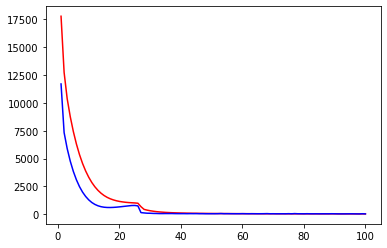

In [28]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')

In [29]:
model.predict(X_test_sc)

array([[160.61458 ],
       [160.43468 ],
       [160.29776 ],
       [159.92383 ],
       [160.10783 ],
       [161.26355 ],
       [162.17186 ],
       [162.14687 ],
       [161.87276 ],
       [161.74411 ],
       [161.15956 ],
       [160.22113 ],
       [159.50221 ],
       [158.76805 ],
       [157.80542 ],
       [156.90196 ],
       [156.39928 ],
       [156.0684  ],
       [155.85387 ],
       [155.59149 ],
       [155.23656 ],
       [154.50468 ],
       [153.79015 ],
       [153.76845 ],
       [154.12546 ],
       [154.12967 ],
       [153.8803  ],
       [153.58583 ],
       [153.28197 ],
       [152.97179 ],
       [152.70815 ],
       [152.36165 ],
       [151.91652 ],
       [151.42635 ],
       [150.99806 ],
       [150.49    ],
       [149.81544 ],
       [149.48376 ],
       [149.47607 ],
       [149.24158 ],
       [148.49492 ],
       [147.20815 ],
       [145.67195 ],
       [144.62517 ],
       [144.27553 ],
       [144.15033 ],
       [144.18639 ],
       [144.1

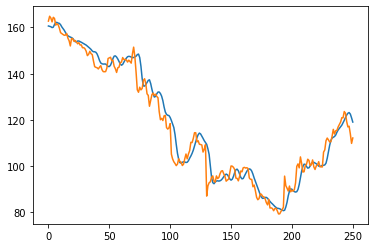

In [30]:
plt.plot(range(len(X_test_sc)),model.predict(X_test_sc).flat)
plt.plot(range(len(X_test_sc)),y_test)

### Reshape the inputs

In [31]:
X_test_sc[0].reshape(1,7,1)

array([[[0.9024883 ],
        [0.88855397],
        [0.77141492],
        [0.82535467],
        [0.83681087],
        [0.75642114],
        [0.72018917]]])

In [32]:
model.predict(X_test_sc[0].reshape(1,7,1))

array([[160.61458]], dtype=float32)

In [33]:
y_test[1000]

162.73

### Create a Model

In [34]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM
model2 = Sequential()
# 256 cels
model2.add(LSTM(256,input_shape=(7,1)))
model2.add(Dropout(0.3))
# single neuron
model2.add(Dense(1))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


Compile the model with the proper optimizer and loss

In [35]:
model2.compile(optimizer='adam',loss='mse')

In [36]:
history2 = model2.fit(X_train_sc,y_train,epochs=100,validation_data=(X_test_sc,y_test))

Train on 1000 samples, validate on 251 samples
Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 17977.3962 - val_loss: 11710.9283
Epoch 2/100
1000/1000 [==============================] - 1s 1ms/step - loss: 12585.6627 - val_loss: 7211.4327
Epoch 3/100
1000/1000 [==============================] - 1s 1ms/step - loss: 10258.6468 - val_loss: 5812.2531
Epoch 4/100
1000/1000 [==============================] - 1s 1ms/step - loss: 8690.6722 - val_loss: 4712.0682
Epoch 5/100
1000/1000 [==============================] - 1s 1ms/step - loss: 7361.3802 - val_loss: 3813.7010
Epoch 6/100
1000/1000 [==============================] - 1s 1ms/step - loss: 6275.8408 - val_loss: 3083.8307
Epoch 7/100
1000/1000 [==============================] - 1s 1ms/step - loss: 5362.3578 - val_loss: 2483.2187
Epoch 8/100
1000/1000 [==============================] - 1s 1ms/step - loss: 4582.6026 - val_loss: 1994.6059
Epoch 9/100
1000/1000 [==============================] - 1s 1ms/step - loss: 

##Evaluate the model with test data

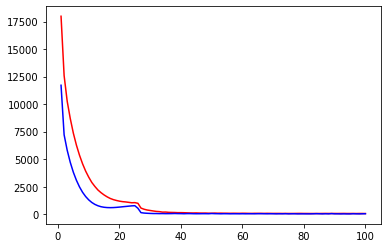

In [37]:
tr_loss = history2.history['loss']
val_loss = history2.history['val_loss']
ep = list(range(1,101))
plt.plot(ep,tr_loss,color='r')
plt.plot(ep,val_loss,color='b')